## Aktivierungsfunktionen

Aktivierungsfunktionen gehören zu den wichtigsten Bestandteilen eines neuronalen Netzes. Sie fügen eine **Nichtlinearität** zwischen die Hidden Layer zu, was **die Lernfähigkeit des Modells stark** beeinflusst, sodass ein neuronales Netz komplexe Muster erkennen kann. Es existieren verschiedene Aktivierungsfunktionen, die in neuronalen Netzen verwendet werden können, darunter Sigmoid, Tanh, ReLU und Softmax etc.. Jede dieser Funktionen hat ihre eigenen Vor- und Nachteile und ist für unterschiedliche Anwendungen geeignet.

## Tipps
- Es existiert keine eindeutige Lösung zu der Fragestellung: Wann soll man welche Aktivierungsfunktion verwenden? Es hängt von der spezifischen Anwendung ab. In vielen Fällen kann es auch sinnvoll sein, verschiedene Aktivierungsfunktionen auszuprobieren und deren Leistung zu vergleichen, um die beste Wahl zu treffen.

- In PyTorch sind die Aktivierungsfunktion unter Modul: `torch.nn` implementiert. In Tensorflow sind sie unter `tf.keras.activations` zu finden (üblicher Weise wird das Package wie folgend importiert `import tensorflow as tf`, daher `tf`).

- Hier sind die öffentlichen Dokumentation zu den Aktivierungsfunktionen in Tensorflow und PyTorch:
<a href="https://www.tensorflow.org/api_docs/python/tf/keras/activations">Aktivierungsfunktion in Tensorflow</a> | <a href="https://pytorch.org/docs/stable/nn.html">Aktivierungsfunktion in PyTorch</a>

- Aktivierungsfunktionen werden übllicher Weise zwischen jedem Hidden Layer hinzugefügt und selbst als ein "Layer" gesehen. z. B.
```python
import torch
import torch.nn as nn

# In moderenen Netze mit PyTorch werden die Module üblicher Weise als eine Klasse implementiert, die nn.Module erbt.
# In init() werden die Layer und Aktivierungsfunktionen definiert und initialisiert.
# In forward() wird die Verarbeitungsreihenfolge definiert.
# Dies kann auch für benutzerdefinierte Aktivierungsfunktion nützlich sein, wenn man eine eigene Aktivierungsfunktion implementieren möchte.

class ExampleNNWithActivationfunction(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 30)
        self.relu = nn.ReLU()           # Aktivierungsfunktion ReLU 1
        self.fc2 = nn.Linear(30, 20)
        self.relu2 = nn.ReLU6()         # Aktivierungsfunktion ReLU6 2
        self.fc3 = nn.Linear(20, 4)
        self.softmax = nn.Softmax()     # Aktivierungsfunktion Softmax für eine Klassifizierungsaufgabe mit 4 Klassen

    def forward(self, x):   # x ist der Eingabedaten, z.B. ein Bild
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x
```
- Um einen besseren Überblick über Aktivierungsfunktionen und ihre Auswirkungen auf ein neuronales Netz zu bekommen, empfehlen wir <a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03436&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">Tensorflow Playground</a>. Dort können Sie manchen gängigen Aktivierungsfunktionen ausprobieren und deren Auswirkungen auf die Lernfähigkeit eines neuronalen Netzes beobachten.

In diesem Notebook werden einige der gängigsten Aktivierungsfunktionen vorgestellt und mit <a href="https://matplotlib.org/">Matplotlib</a> visualisiert.

In [27]:
# Packege importieren
from typing import Callable
import matplotlib.pyplot as plt
import torch

In [40]:
# Funktion für die Visualisierung
def show_activationfunction(activation: Callable[[torch.Tensor], torch.Tensor]) -> None:
    x = torch.linspace(-10, 10, 1000, requires_grad=True)  #  Eingabedaten generieren
    y = activation(x)   # Aktivierungsfunktion auf die Eingabedaten anwenden
    y.backward(torch.ones_like(x))  # Berechnung der Ableitung
    ableitung = x.grad  # Die Werten von Ableitung der Aktivierungsfunktion entnehmen

	# Visualisierung der Aktivierungsfunktion und ihrer Ableitung mit Matplotlib
    plt.plot(x.detach().numpy(), y.detach().numpy())
    plt.plot(x.detach().numpy(), ableitung.detach().numpy())
    plt.grid(True)
    plt.legend(["Akfunc", "Ableitung Akfunc"])
    plt.title(f"Activation Function: {activation.__class__.__name__}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


## Tanh
Mathematische Funktion und ihre Ableitung

$$
f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

$$
f´(x) = \frac{4}{(e^{x}+e^{-x})^2} = 1 - f(x)^2
$$

**Vorteile**
- Transformiert die Ausgabe in den Bereich [-1, 1]. Negative Werte werden in negative Werte transformiert und positive Werte in positive Werte.

**Nachteile**
- Wenn der Eingabewert zu groß oder zu klein ist, kann die Ableitung sehr klein werden, was die Aktualisierung der Gewichten negativ beeinflusst.
- Die Berechnung der Exponentialfunktion kann teuer sein (längerer Trainingsdauer).
- Kann aufgrund der Kettenregel zur "Vanishing Gradient" führen, wenn ein Netz mehreren Hidden Layers hat.

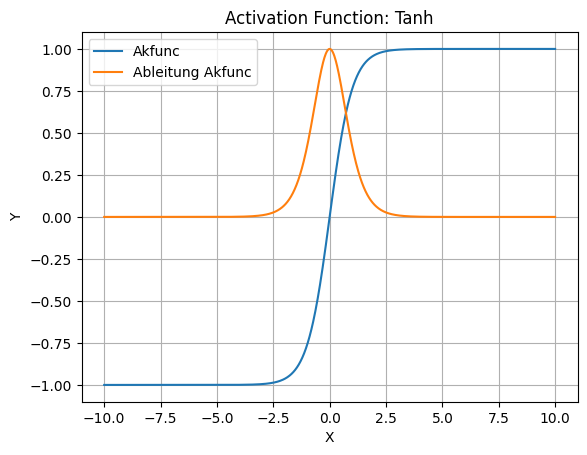

In [41]:
tanh_layer = torch.nn.Tanh()
show_activationfunction(tanh_layer)

## Sigmoid
Mathematische Funktion und ihre Ableitung

$$
f(x) = \frac{1}{1+e^{-x}}
$$

$$
f´(x) = \frac{e^{-x}}{(1+e^{-x})^2} = f(x) * (1 - f(x))
$$

**Vorteile**:
- Transformiert das Ausgabe in den Bereich [0, 1], was für binäre Klassifikationsprobleme nützlich ist.
- Normalisiert das Ausgabe, indem die Werten zwischen 0 und 1 skaliert werden

**Nachteile**:
- Der maximale Gradient ist 0.25. Dies Kann zu einem Problem führen, das als "Vanishing Gradient" bekannt ist, wenn die Eingaben größer als 5 und kleiner als -5 sind.
- Hohe Berechnungsaufwand und Resourcenverbrauch, da die Funktion exponentielle Berechnungen erfordert, was die Trainingszeit eines Netzes verlängert.

Sigmoid wird üblicher Weise für den Output Layer verwendet, wenn die Ausgabe eine Wahrscheinlichkeit ist (z.B. bei binären Klassifikationsproblemen oder Attention Maps in Bildverarbeitung erzeugen).


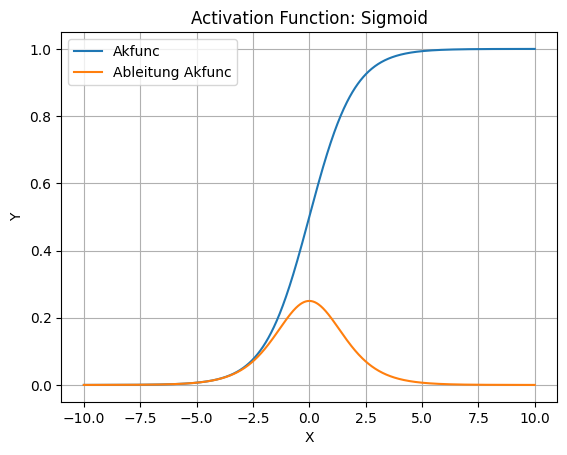

In [55]:
sigmoid_layer = torch.nn.Sigmoid()
show_activationfunction(sigmoid_layer)

## ReLU (Rectified Linear Unit)
Veröffentlichung zur ReLU: <a href="https://dl.acm.org/doi/10.5555/3104322.3104425">Rectified Linear Units Improve Restricted Boltzmann Machines</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
x &  \text{x} \ge 0 \\
0 &  \text{x} < 0
\end{cases}
$$

$$
f´(x) = \begin{cases}
1 &  \text{x} \ge 0 \\
0 &  \text{x} < 0
\end{cases}
$$

**Vorteile**
- Effizient in der Berechnung, schnellere Konvergenz.
- Vermeidet das Vanishing Gradient Problem, da die Ableitung 1 ist, wenn der Eingabe positiv ist.


**Nachteile**
- Gradient ist 0, wenn der Eingabe kleiner als 0 ist. Führt zu einem Problem, das als "Dead ReLU" bekannt ist, wenn die Neuronen in einem Netz nicht mehr lernen können. (Denken Sie an der Aktualisierung der Gewichten, wenn die Ableitung 0 ist, dann werden die Gewichte nicht aktualisiert).


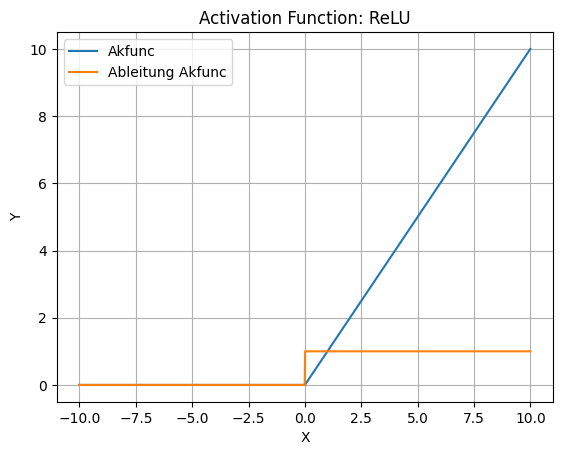

In [50]:
relu_layer = torch.nn.ReLU()
show_activationfunction(relu_layer)

## ReLU6

Veröffentlichung zur ReLU6: <a href="https://doi.org/10.48550/arXiv.1704.04861">MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
6 &  \text{x} > 6 \\
0 &  \text{x} \le 0 \\
x &  \text{x} \le 6
\end{cases}
$$
$$
f´(x) = \begin{cases}
0 &  \text{x} > 6 \\
0 &  \text{x} \le 0 \\
1 &  \text{x} \le 6
\end{cases}
$$

ReLU6 wurde von Google entwickelt, um die Genauigkeit des MobileNet Modells auf mobilen Geräten zu verbessern. Es ist eine Variante der ReLU-Funktion, die die Ausgabe auf einen maximalen Wert von 6 beschränkt.
In manchen Fällen kann ReLU6 eine bessere Leistung als ReLU erzielen.


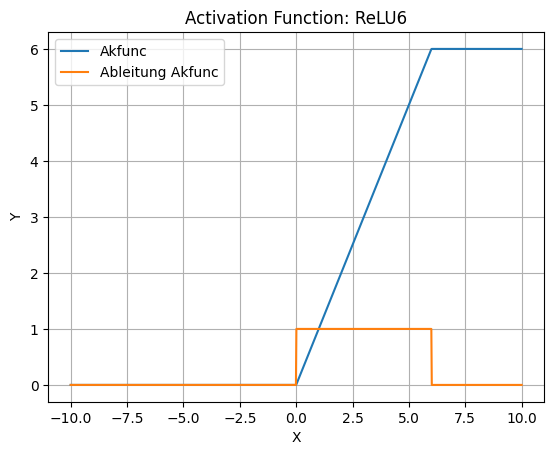

In [51]:
relu6_layer = torch.nn.ReLU6()
show_activationfunction(relu6_layer)

## Leaky ReLU

Veröffentlichung zur Leaky ReLU: <a href="https://www.awnihannun.com/papers/relu_hybrid_icml2013_final.pdf">Rectifier nonlinearities improve neural network acoustic models</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
x &  \text{x} \ge 0 \\
\lambda * x &  \text{x} < 0
\end{cases}
$$

$$
f´(x) = \begin{cases}
1 &  \text{x} \ge 0 \\
\lambda &  \text{x} < 0
\end{cases}
$$

$$
\lambda \in (0, 1)
$$

$\lambda$ ist ein einstellbare Parameter, der die Steigung der Funktion für negative Eingaben bestimmt. Ein typischer Wert ist 0.01.

**Vorteile**
- Vermeidet das "Dead ReLU" Problem, da die Ableitung für negative Eingaben nicht 0 ist.
- Bietet eine kleine Steigung für negative Eingaben, was die Lernfähigkeit des Modells verbessert.


**Nachteile**
- Kann dem Trainingprozess verlangsamen, da die Ableitung für negative Eingaben eine kleine Wert hat.



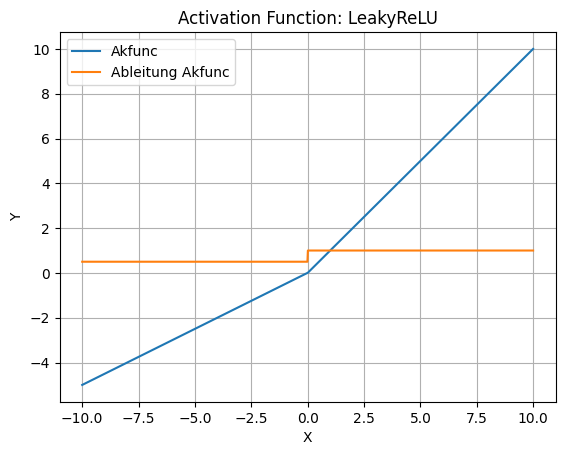

In [42]:
leaky_relu_layer = torch.nn.LeakyReLU(negative_slope=0.5)  # Lambda = 0.5 für eine bessere Visualisierung
show_activationfunction(leaky_relu_layer)

## PReLU

Veröffentlichung zur PReLU: <a href="https://arxiv.org/abs/1502.01852">Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
x &  \text{x} \ge 0 \\
\alpha * x &  \text{x} < 0
\end{cases}
$$

$$
f´(x) = \begin{cases}
1 &  \text{x} \ge 0 \\
\alpha &  \text{x} < 0
\end{cases}
$$

$\alpha$ ist ein trainierbare Parameter, der die Steigung der Funktion für negative Eingaben bestimmt. Der Anfangswert ist üblicher Weise 0.25 und wird während des Trainings angepasst.

**Vorteile**
- Ist fähig sich zwischen ReLU und Leaky ReLU zu transformieren. wenn $\alpha$ = 0, dann ist die Funktion ReLU und wenn $\alpha$ größer 0 ist, dann ist die Funktion Leaky ReLU.
- bietet mehr Flexibilität als Leaky ReLU bzw. ReLu, da $\alpha$ während des Trainings angepasst wird.


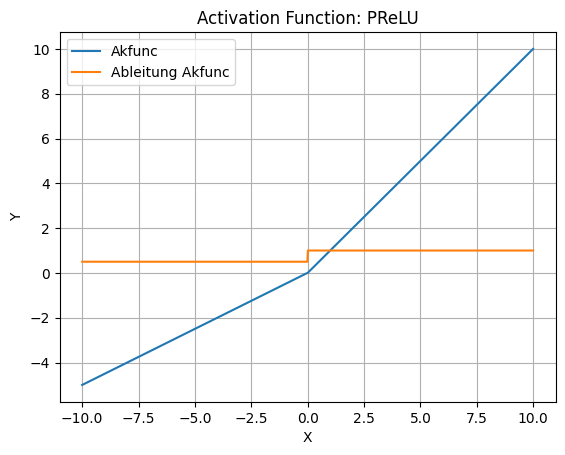

In [46]:
prelu_layer = torch.nn.PReLU(init=0.5)
show_activationfunction(prelu_layer)

## ELU (Exponential Linear Unit)

Veröffentlichung zur ELU: <a href="https://arxiv.org/abs/1511.07289">Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
x &  \text{x} \ge 0 \\
\alpha * (e^x - 1) &  \text{x} < 0
\end{cases}
$$

$$
f´(x) = \begin{cases}
1 &  \text{x} \ge 0 \\
\alpha * e^x &  \text{x} < 0
\end{cases}
$$

$\alpha$ ist ein einstellbare Parameter. Der typische Wert ist 1.

**Vorteile**
- Robust gegenüber Rauschen
- Vermeidet das "Dead ReLU" Problem
- Vermeidet das Vanishing Gradient Problem

**Nachteile**
- Höherer Rechenaufwand, kann die Trainingszeit verlängern.


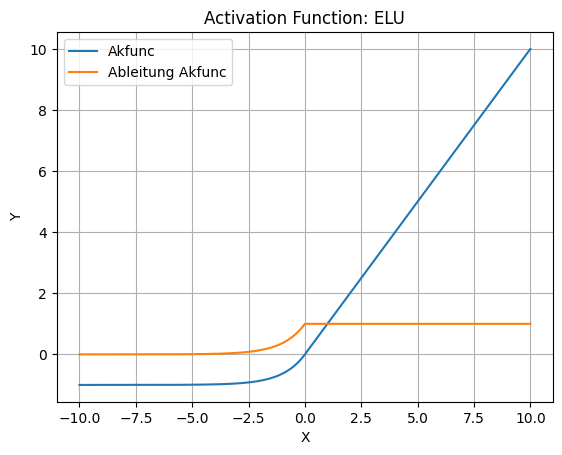

In [45]:
elu_layer = torch.nn.ELU()
show_activationfunction(elu_layer)

## SELU (Scaled Exponential Linear Unit)
Veröffentlichung zur SELU: <a href="https://arxiv.org/abs/1706.02515">Self-Normalizing Neural Networks</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
\lambda * x &  \text{x} \ge 0 \\
\lambda * \alpha * (e^x - 1) &  \text{x} < 0
\end{cases}
$$
$$
f´(x) = \begin{cases}
\lambda &  \text{x} \ge 0 \\
\lambda * \alpha * e^x &  \text{x} < 0
\end{cases}
$$

$\lambda$ und $\alpha$ sind vordefinierte Parameter. Der typische Wert für $\lambda$ ist 1.0507 und für $\alpha$ ist 1.6733.

**Vorteile**
- Wenn die Gewichte eines Netzes mit der Normalverteilung initialisiert ist, die Output von jedem Hidden Layer passen sich an die Normalverteilung an, d.h. die Ausgabe hat einen Mittelwert von 0 und eine Varianz von 1. Dies beschleunigt das Training.
- Vermeidet Grandientenexplosion und -verschwindung (Vanishing).

**Nachteile**
- Höherer Rechenaufwand.

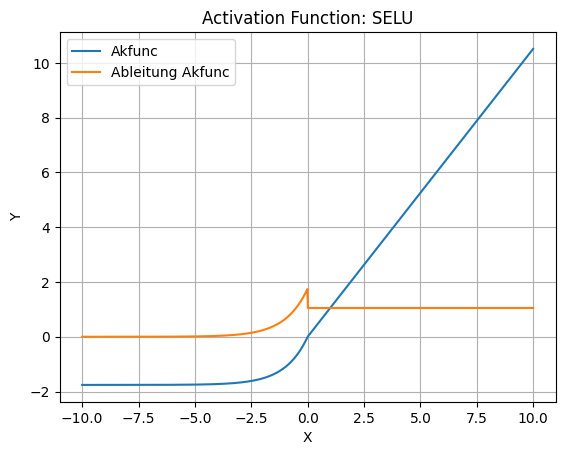

In [56]:
selu_layer = torch.nn.SELU()
show_activationfunction(selu_layer)

## SiLU (Sigmoid Linear Unit)

Auch als **Swish** bekannt.

Veröffentlichung zur SiLU: <a href="https://arxiv.org/abs/2002.05202">Searching for Activation Functions</a> |
<a href="https://doi.org/10.48550/arXiv.1702.03118">Sigmoid-Weighted Linear Units for Neural Network Function Approximation in Reinforcement Learning</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = x * \frac{1}{1+e^{-x}}
$$
$$
f´(x) = \frac{1}{1+e^{-x}} + x * \frac{e^{-x}}{(1+e^{-x})^2} = f(x) + \sigma(x) * (1 - f(x))
$$


**Vorteile**
- Vermeidet das "Dead ReLU" Problem
- stetige Ableitung
- Für tiefere Netze besser geeignet

**Nachteile**
- Höherer Rechenaufwand
- Kann zur Gradientvanishing führen, wenn der Eingabe eine große negative Wert ist.



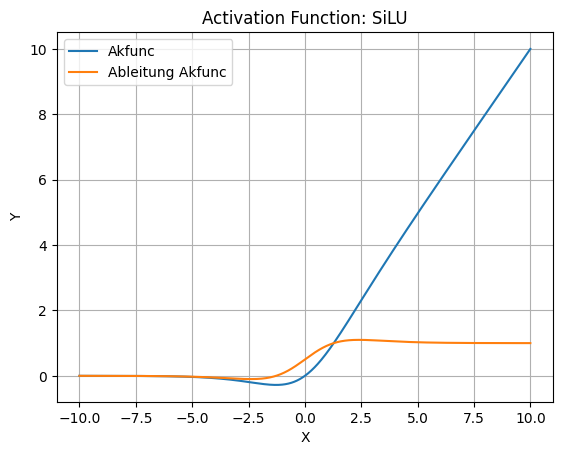

In [48]:
silu_layer = torch.nn.SiLU()
show_activationfunction(silu_layer)

## Hardwish

Veröffentlichung zur Hardwish: <a href="https://doi.org/10.48550/arXiv.1905.02244">Searching for MobileNetV3</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
x &  \text{x} \ge 3 \\
0 &  \text{x} \le -3 \\
x * (x +3) / 6 &  \text{otherwise}
\end{cases}
$$
$$
f´(x) = \begin{cases}
1 &  \text{x} \ge 3 \\
0 &  \text{x} \le -3 \\
(2x + 3) / 6 &  \text{otherwise}
\end{cases}
$$


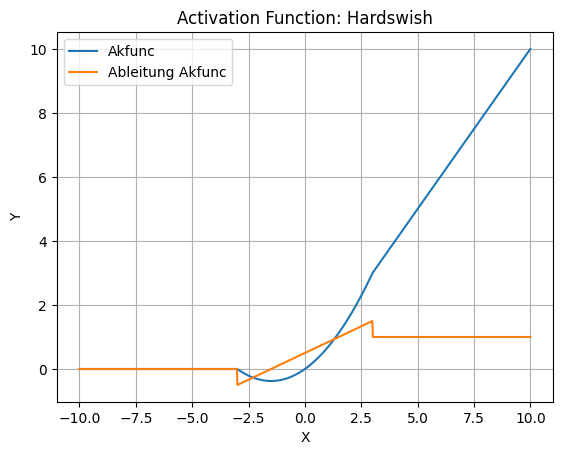

In [49]:
hardswish_layer = torch.nn.Hardswish()
show_activationfunction(hardswish_layer)

## Mish

Veröffentlichung zur Mish: <a href="https://arxiv.org/abs/1908.08681">Mish: A Self Regularized Non-Monotonic Neural Activation Function</a>

Mathematische Funktion
$$
f(x) = x * tanh(softplus(x))
$$
$$
Softplus(x) = \ln(1 + e^x)
$$

Ähnlich wie SiLU, aber mit einer anderen Aktivierungsfunktion.

**Vorteile**
- Steigt die Genauigkeit eines Netzes

**Nachteile**
- Höherer Rechenaufwand


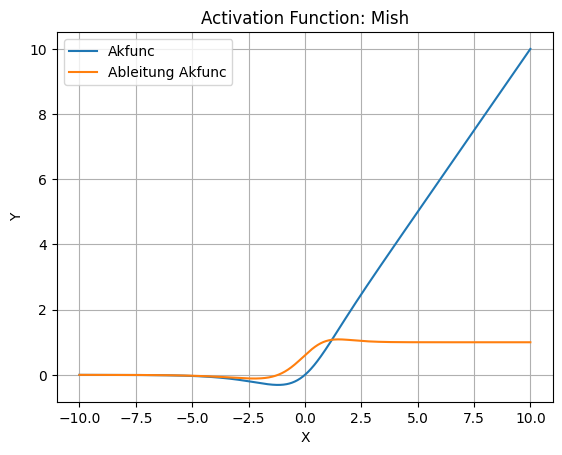

In [44]:
mish_layer = torch.nn.Mish()
show_activationfunction(mish_layer)

## CELU (Continuously Differentiable Exponential Linear Unit)
Veröffentlichung zur CELU: <a href="https://arxiv.org/abs/1704.07483">Continuously Differentiable Exponential Linear Units</a>

Mathematische Funktion und ihre Ableitung
$$
f(x) = \begin{cases}
x &  \text{x} \ge 0 \\
\alpha * (e^{(x/\alpha)} - 1) &  \text{x} < 0
\end{cases}
$$
$$
f´(x) = \begin{cases}
1  & \text{x} \ge 0 \\
e^{(x/\alpha)} &  \text{x} < 0
\end{cases}
$$

$\alpha$ ist ein einstellbare Parameter. Der typische Wert ist 1.

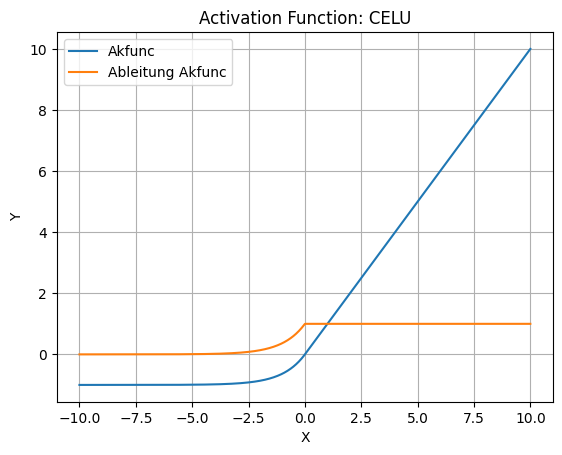

In [47]:
celu_layer = torch.nn.CELU()
show_activationfunction(celu_layer)

## GELU (Gaussian Error Linear Unit)

Veröffentlichung zur GELU: <a href="https://arxiv.org/abs/1606.08415">Gaussian Error Linear Units (GELUs)</a>

Mathematische Funktion
$$
f(x) = 0.5 * x * (1 + tanh(\sqrt{\frac{2}{\pi}} * (x + 0.044715 * x^3)))
$$
oder
$$
f(x) = x * \sigma(1.702 * x)
$$

Wobei $\sigma(1.702x)$ die Sigmoidfunktion ist.

**Vorteile**
- geeignet für Optimierer mit Momentum
- Vermeidet das "Dead ReLU" Problem


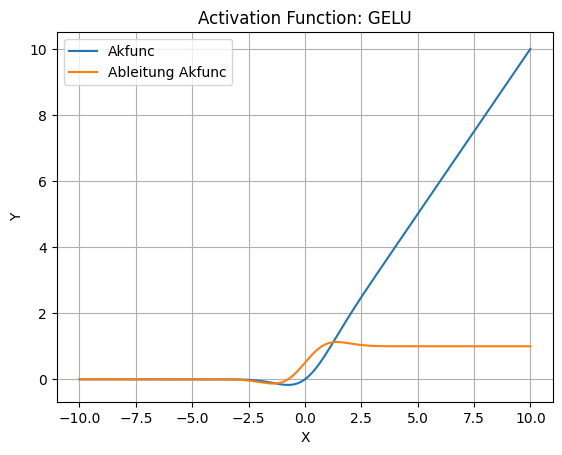

In [52]:
gelu_layer = torch.nn.GELU()
show_activationfunction(gelu_layer)

## Softplus

Mathematische Funktion und ihre Ableitung
$$
f(x) = \ln(1 + e^x)
$$
$$
f´(x) = \frac{e^x}{1 + e^x} = \sigma(x)
$$

- Softplus kann als eine glatte Version der ReLU betrachtet werden. In manche Fälle kann Softplus eine bessere Leistung als ReLU erzielen.
- In der Funktion ist eine "+1" zu sehen, es dafür dient, dass keine negative Wert entsteht.

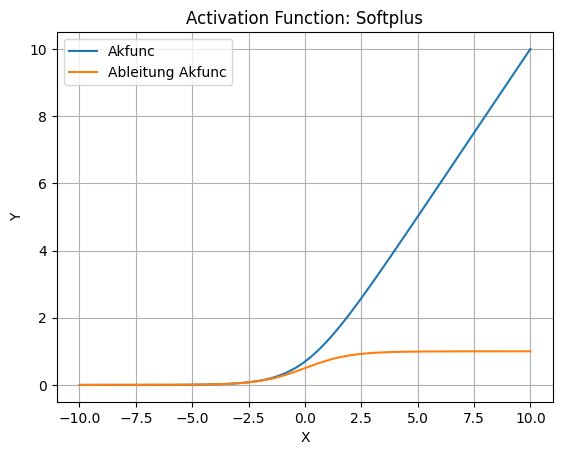

In [53]:
softplus_layer = torch.nn.Softplus()
show_activationfunction(softplus_layer)

## Softmax
Mathematische Funktion
$$
f(x) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}
$$

Softmax wird üblicher Weise für den Output Layer verwendet. Sie transformiert das Ausgabe in einer Wahrscheinlichkeitsverteilung (z.B. bei multi-class Klassifikationsproblemen, mehr als 2 Klassen).
Es ist für eine Klassifizierungsaufgaben mit hohen Klassenanzahl nicht gut geeignet, da die Berechnung der Exponentialfunktion teuer ist. (z.B. bei NLP Aufgaben mit großen Vokabularen).

C:\Users\denni\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


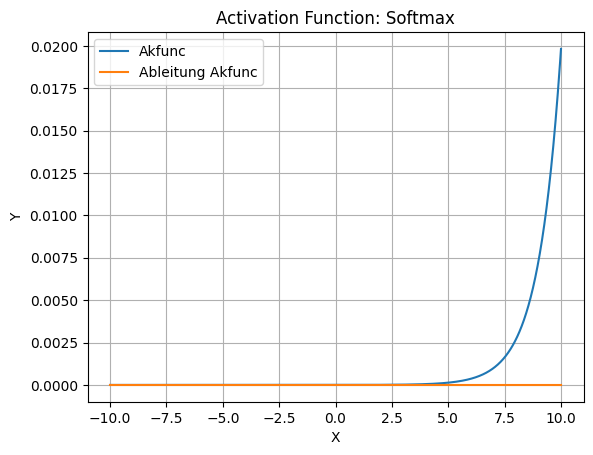

In [54]:
softmax_layer = torch.nn.Softmax()
show_activationfunction(softmax_layer)